<a href="https://colab.research.google.com/github/nhinguyen08/netflix/blob/main/Italycovid_pythonproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download this file using the urlretrieve function from the urllib.request module.
from urllib.request import urlretrieve

In [ ]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'
urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x7c2f4ad7d6f0>)

In [ ]:
#import pandas library
import pandas as pd

#import data
covid_df = pd.read_csv('italy-covid-daywise.csv')

# **Explore dataset**

In [ ]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN




*  The metrics reported are new cases, deaths, and tests
*   Data is provided for 248 days: from Dec 31, 2019, to Sep 3, 2020






In [ ]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


View statistical information for numerical columns (mean, standard deviation, minimum/maximum values, and the number of non-empty values)

In [ ]:
covid_df.shape

(248, 4)

 Retrieve the number of rows and columns in the data frame
 => In the dataset it have 248 records and 4 columns

In [ ]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [ ]:
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


Notice above that while the first few values in the new_cases and new_deaths columns are 0, the corresponding values within the new_tests column are NaN. In this dataset, it represents that daily test numbers were not reported on specific dates.
=> find the first index that doesn't contain a NaN value using a column's first_valid_index method.

In [ ]:
covid_df.new_tests.first_valid_index()

111

Look at a few rows before and after this index to verify that the values change from NaN to actual numbers. We can do this by passing a range to loc.

In [ ]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


=> Italy started reporting daily tests on Apr 20, 2020

In [ ]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
200,2020-07-18,231.0,11.0,27569.0
127,2020-05-06,1075.0,236.0,37771.0
169,2020-06-17,210.0,34.0,33957.0
76,2020-03-16,2823.0,370.0,NaN
238,2020-08-25,953.0,4.0,45798.0
191,2020-07-09,193.0,15.0,29947.0
102,2020-04-11,3951.0,570.0,NaN
165,2020-06-13,163.0,56.0,32880.0
236,2020-08-23,1071.0,3.0,47463.0
24,2020-01-24,0.0,0.0,NaN


Retrieve a random sample of rows from the data frame.

# **Analyzing data from data frame**

### **What are the total number of reported cases and deaths related to Covid-19 in Italy?**

In [ ]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [ ]:
print('The number of reported cases is {}'. format(int(total_cases)))
print('The number of reported deaths is {}'.format(int(total_deaths)))

The number of reported cases is 271515
The number of reported deaths is 35497


### **What is the overall death rate (ratio of reported deaths to reported cases)?**

In [ ]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [ ]:
print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

The overall reported death rate in Italy is 13.07 %.


### **What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.**

In [ ]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [ ]:
print('The overall number of tests conducted is {}'.format(int(total_tests)))

The overall number of tests conducted is 5214766


## **What fraction of tests returned a positive result?**

In [ ]:
positive_rate = total_cases/ total_tests

In [ ]:
print('{:.2f}% of tests in Italy led to a positive diagnosis'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis


In [ ]:
#Sort data: the days which had more than 1000 reported cases
high_new_cases = covid_df.new_cases > 1000
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [ ]:
#change some display options to view all the rows
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])


NameError: name 'pd' is not defined

Determine the days when the ratio of cases reported to tests conducted is higher than the overall positive_rate.

In [ ]:
positive_rate

0.05206657403227681

In [ ]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [ ]:
high_ratio_df.shape

(12, 4)

=> 12 days with the ratio of cases reported to tests conducted is higher than the overal

In [ ]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests,positive_rate
82,2020-03-22,6557.0,795.0,NaN,NaN
87,2020-03-27,6153.0,660.0,NaN,NaN
81,2020-03-21,5986.0,625.0,NaN,NaN
89,2020-03-29,5974.0,887.0,NaN,NaN
88,2020-03-28,5959.0,971.0,NaN,NaN
83,2020-03-23,5560.0,649.0,NaN,NaN
80,2020-03-20,5322.0,429.0,NaN,NaN
85,2020-03-25,5249.0,743.0,NaN,NaN
90,2020-03-30,5217.0,758.0,NaN,NaN
86,2020-03-26,5210.0,685.0,NaN,NaN


=> It looks like the last two weeks of March had the highest number of daily cases. Let's compare this to the days where the highest number of deaths were recorded.

In [ ]:
covid_df.sort_values('new_deaths',ascending = False).head(10)

,date,new_cases,new_deaths,new_tests,positive_rate
88,2020-03-28,5959.0,971.0,NaN,NaN
89,2020-03-29,5974.0,887.0,NaN,NaN
92,2020-04-01,4053.0,839.0,NaN,NaN
91,2020-03-31,4050.0,810.0,NaN,NaN
82,2020-03-22,6557.0,795.0,NaN,NaN
95,2020-04-04,4585.0,764.0,NaN,NaN
94,2020-04-03,4668.0,760.0,NaN,NaN
90,2020-03-30,5217.0,758.0,NaN,NaN
85,2020-03-25,5249.0,743.0,NaN,NaN
93,2020-04-02,4782.0,727.0,NaN,NaN


=> It appears that daily deaths hit a peak just about a week after the peak in daily new cases.

In [ ]:
#look at the days with the least number of cases.
#expect to see the first few days of the year on this list.

covid_df.sort_values('new_cases').head(10)


,date,new_cases,new_deaths,new_tests,positive_rate
172,2020-06-20,-148.0,47.0,29875.0,-0.004954
0,2019-12-31,0.0,0.0,NaN,NaN
29,2020-01-29,0.0,0.0,NaN,NaN
30,2020-01-30,0.0,0.0,NaN,NaN
32,2020-02-01,0.0,0.0,NaN,NaN
33,2020-02-02,0.0,0.0,NaN,NaN
34,2020-02-03,0.0,0.0,NaN,NaN
36,2020-02-05,0.0,0.0,NaN,NaN
37,2020-02-06,0.0,0.0,NaN,NaN
38,2020-02-07,0.0,0.0,NaN,NaN


The count of new cases on Jun 20, 2020, was -148, a negative number
=> Let's look at some days before and after Jun 20, 2020.

In [ ]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests,positive_rate
169,2020-06-17,210.0,34.0,33957.0,0.006184
170,2020-06-18,328.0,43.0,32921.0,0.009963
171,2020-06-19,331.0,66.0,28570.0,0.011586
172,2020-06-20,-148.0,47.0,29875.0,-0.004954
173,2020-06-21,264.0,49.0,24581.0,0.010740
174,2020-06-22,224.0,24.0,16152.0,0.013868
175,2020-06-23,221.0,23.0,23225.0,0.009516


 Let's assume this was indeed a data entry error => Replace it with the average of the values on the previous & next date

In [ ]:
covid_df.at[172,'new_cases'] = (covid_df.at[171,'new_cases'] + covid_df.at[173,'new_cases']) / 2

In [ ]:
#Working with dates
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
5      2020-01-05
6      2020-01-06
7      2020-01-07
8      2020-01-08
9      2020-01-09
10     2020-01-10
11     2020-01-11
12     2020-01-12
13     2020-01-13
14     2020-01-14
15     2020-01-15
16     2020-01-16
17     2020-01-17
18     2020-01-18
19     2020-01-19
20     2020-01-20
21     2020-01-21
22     2020-01-22
23     2020-01-23
24     2020-01-24
25     2020-01-25
26     2020-01-26
27     2020-01-27
28     2020-01-28
29     2020-01-29
30     2020-01-30
31     2020-01-31
32     2020-02-01
33     2020-02-02
34     2020-02-03
35     2020-02-04
36     2020-02-05
37     2020-02-06
38     2020-02-07
39     2020-02-08
40     2020-02-09
41     2020-02-10
42     2020-02-11
43     2020-02-12
44     2020-02-13
45     2020-02-14
46     2020-02-15
47     2020-02-16
48     2020-02-17
49     2020-02-18
50     2020-02-19
51     2020-02-20
52     2020-02-21
53     2020-02-22
54     2020-02-23
55     202

In [ ]:
# data type of date is currently object => covert  it into a datetime column
covid_df['date'] = pd.to_datetime(covid_df.date)

In [ ]:
#extract different parts of the data into separate columns
covid_df['year']=pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd. DatetimeIndex(covid_df.date).month
covid_df['day'] = pd. DatetimeIndex(covid_df.date).day

In [ ]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4
5,2020-01-05,0.0,0.0,NaN,NaN,2020,1,5
6,2020-01-06,0.0,0.0,NaN,NaN,2020,1,6
7,2020-01-07,0.0,0.0,NaN,NaN,2020,1,7
8,2020-01-08,0.0,0.0,NaN,NaN,2020,1,8
9,2020-01-09,0.0,0.0,NaN,NaN,2020,1,9


In [ ]:
pd.reset_option

In [ ]:
covid_month_df = covid_df.groupby('month')[['new_cases','new_deaths', 'new_tests']].sum()

In [ ]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [ ]:
# Merging data from multiple sources
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv',
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x7c2f191beda0>)

In [ ]:
locations_df = pd.read_csv('locations.csv')

In [ ]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
5,Anguilla,North America,1.500200e+04,81.88,NaN,NaN
6,Antigua and Barbuda,North America,9.792800e+04,77.02,3.800,21490.943
7,Argentina,South America,4.519578e+07,76.67,5.000,18933.907
8,Armenia,Asia,2.963234e+06,75.09,4.200,8787.580
9,Aruba,North America,1.067660e+05,76.29,NaN,35973.781


In [ ]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [ ]:
covid_df['location'] = "Italy"

In [ ]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,location
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,Italy
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,Italy
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,Italy
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,Italy
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,Italy
5,2020-01-05,0.0,0.0,NaN,NaN,2020,1,5,Italy
6,2020-01-06,0.0,0.0,NaN,NaN,2020,1,6,Italy
7,2020-01-07,0.0,0.0,NaN,NaN,2020,1,7,Italy
8,2020-01-08,0.0,0.0,NaN,NaN,2020,1,8,Italy
9,2020-01-09,0.0,0.0,NaN,NaN,2020,1,9,Italy


In [ ]:
merged_df = covid_df.merge(locations_df, on="location")


In [ ]:
merged_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,Italy,Europe,60461828.0,83.51,3.18,35220.084
5,2020-01-05,0.0,0.0,NaN,NaN,2020,1,5,Italy,Europe,60461828.0,83.51,3.18,35220.084
6,2020-01-06,0.0,0.0,NaN,NaN,2020,1,6,Italy,Europe,60461828.0,83.51,3.18,35220.084
7,2020-01-07,0.0,0.0,NaN,NaN,2020,1,7,Italy,Europe,60461828.0,83.51,3.18,35220.084
8,2020-01-08,0.0,0.0,NaN,NaN,2020,1,8,Italy,Europe,60461828.0,83.51,3.18,35220.084
9,2020-01-09,0.0,0.0,NaN,NaN,2020,1,9,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [ ]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

AttributeError: 'DataFrame' object has no attribute 'total_cases'

In [ ]:
merged_df['total_cases'] = merged_df.new_cases.cumsum()

In [ ]:
merged_df['total_deaths'] = merged_df.new_deaths.cumsum()

In [ ]:
merged_df['total_tests'] = merged_df.new_tests.cumsum() + initial_tests

In [ ]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [ ]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [ ]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

# Basic Plotting with Pandas

In [ ]:
#create a result data set with specific columns
result_df = merged_df[['date',
                       'new_cases',
                       'total_cases',
                       'new_deaths',
                       'total_deaths',
                       'new_tests',
                       'total_tests',
                       'cases_per_million',
                       'deaths_per_million',
                       'tests_per_million']]

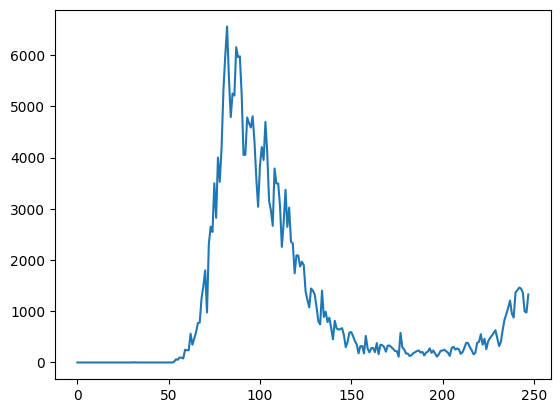

In [ ]:
result_df.new_cases.plot();

In [ ]:
#use the date column as the index for the data frame
result_df.set_index('date', inplace=True)

<Axes: xlabel='date'>

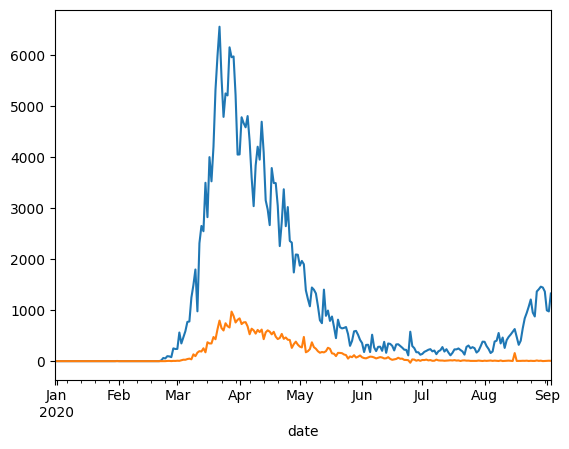

In [ ]:
#plot the new cases & new deaths per day as line graphs.
result_df.new_cases.plot()
result_df.new_deaths.plot()

<Axes: xlabel='date'>

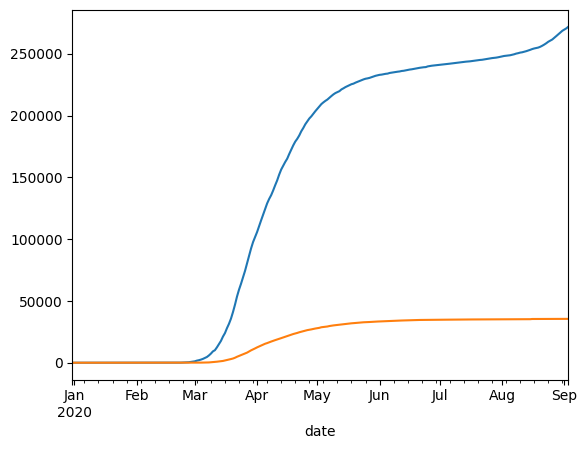

In [ ]:
# compare the total cases vs. total deaths
result_df.total_cases.plot()
result_df.total_deaths.plot()

In [ ]:
#See how the death rate and positive testing rates vary over time.
death_rate = result_df.total_deaths / result_df.total_cases

<Axes: title={'center': 'Death Rate'}, xlabel='date'>

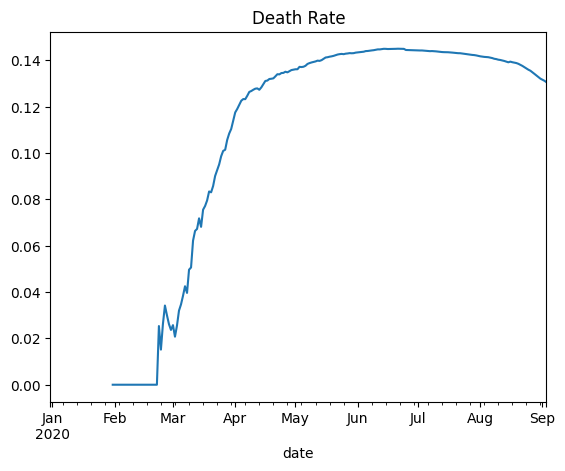

In [ ]:
death_rate.plot(title='Death Rate')

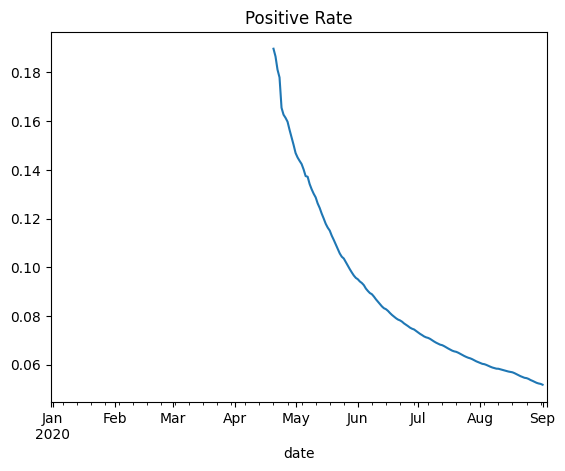

In [ ]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');

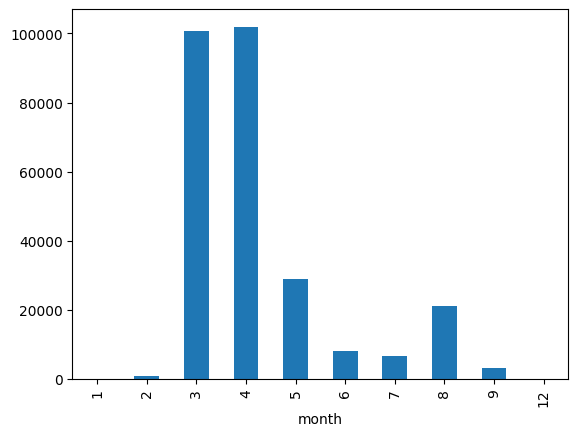

In [ ]:
#Using a bar chart to visualize the trend at a higher level.
covid_month_df.new_cases.plot(kind='bar');

<Axes: xlabel='month'>

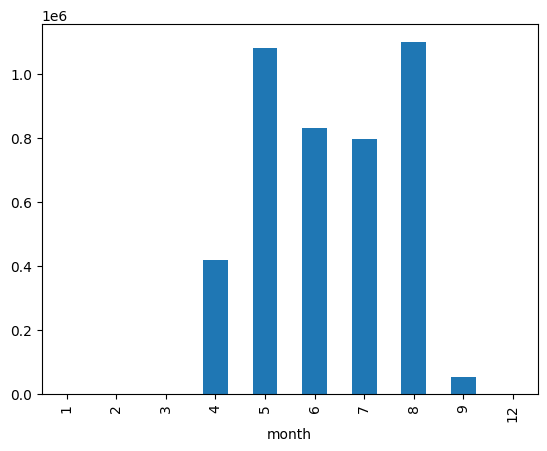

In [ ]:
covid_month_df.new_tests.plot(kind= 'bar')